# MAGIC7 Emulated Fluxes

In [1]:
# Import Modules
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import datetime

In [3]:
magic = xr.load_dataset("/data/artemis/simulations/Magic7/magicc7-ar6-wg1-tuning-carbon-cycle-output_v20210701.nc")

/home/vbennington/.conda/envs/xesmf_env/lib/python3.7/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/vbennington/.conda/envs/xesmf_env/lib/python3.7/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


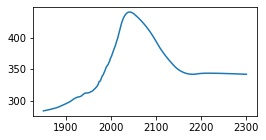

In [6]:
fig = plt.figure(figsize=(4,2))
plt.plot(np.linspace(1850,2300,451),magic.co2s[0,:,:].mean("ensemble_member"))

In [7]:
mscenarios = magic.scenario.values
print(mscenarios)
scenarios = ['ssp119','ssp126','ssp245','ssp534','ssp585']
mindex = [0,1,2,6,7]

['ssp119' 'ssp126' 'ssp245' 'ssp370' 'ssp434' 'ssp460' 'ssp534-over'
 'ssp585']


In [8]:
magic_fgco2 = magic.fgco2
magic_co2s = magic.co2s
magic_nbp = magic.nbp

In [9]:
# Scenarios and Models and Directories

# CNRM has river carbon inputs and its flux is 1PG/YR lower than other models
# Adjust by 1 PG/YR?

root_dir = "/data/artemis/simulations/CMIP6"
ssp126_dir = f"{root_dir}/SSP126"
ssp119_dir = f"{root_dir}/SSP119"
ssp245_dir = f"{root_dir}/SSP245"
ssp534_dir = f"{root_dir}/SSP534"
ssp585_dir = f"{root_dir}/SSP585"  # Same as SSP5-34 until 2040

cscenarios = ['ssp119','ssp126','ssp245','ssp534','ssp585']
scen_disp = ['SSP1-19','SSP1-26','SSP2-45','SSP5-34','SSP5-85']
scen_fold = ['SSP119','SSP126','SSP245','SSP534','SSP585']
scen_colors = ['blue','cyan','green','orange','red'] # hottest most red here

# Only those with several ensemble members used here:
# CNRM not used because of river carbon inputs into ocean:
models = np.array([["MIROC-ES2L","CanESM5","IPSL-CM6A-LR","UKESM1-0-LL","CNRM-ESM2-1"], # ssp1-19
                  ["ACCESS-ESM1-5","MIROC-ES2L","IPSL-CM6A-LR","MPI-ESM1-2-LR","UKESM1-0-LL","CNRM-ESM2-1"], #ssp1-26
                  ["ACCESS-ESM1-5","IPSL-CM6A-LR","MPI-ESM1-2-LR","MPI-ESM1-2-HR","NorESM2-MM","UKESM1-0-LL","CNRM-ESM2-1"], # ssp2-45
                  ["CanESM5","CESM2-WACCM","IPSL-CM6A-LR","UKESM1-0-LL","CNRM-ESM2-1"], #ssp5-34
                  ["ACCESS-ESM1-5","IPSL-CM6A-LR","MPI-ESM1-2-LR","UKESM1-0-LL","CNRM-ESM2-1"]],dtype=object) # ssp5-85

In [11]:
time = np.linspace(1850,2300,451) # Emulated 1850-2300

In [10]:
## Plot in specific order so that SSP5-34 and SSP2-45 are not behind SSP5-85

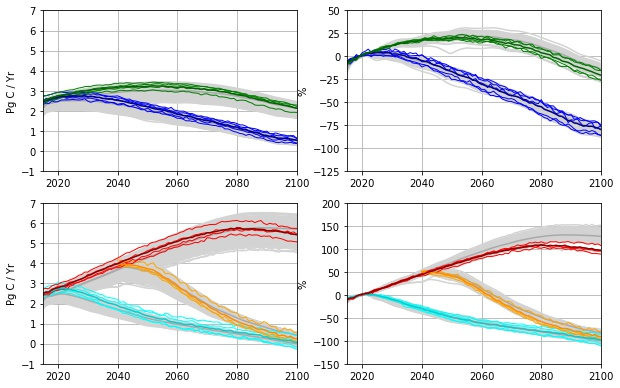

In [14]:
scens = np.array(['ssp126','ssp245','ssp119','ssp534','ssp585']) # order of plotting

# 3 Ensemble Members or More:
ind_models = np.array([['ACCESS-ESM1-5','IPSL-CM6A-LR','MIROC-ES2L','MPI-ESM1-2-LR','UKESM1-0-LL'],
                      ['ACCESS-ESM1-5','IPSL-CM6A-LR','MPI-ESM1-2-LR','UKESM1-0-LL'], #ssp2-45
                      ['CanESM5','IPSL-CM6A-LR','MIROC-ES2L','UKESM1-0-LL'], #ssp1-19
                      ['IPSL-CM6A-LR','UKESM1-0-LL','CanESM5'], #5-34
                     ['ACCESS-ESM1-5','IPSL-CM6A-LR','MPI-ESM1-2-LR','UKESM1-0-LL']],dtype=object)


mindex = [1,2,0,6,7]
sfold = ['SSP126','SSP245','SSP119','SSP534','SSP585']
scolors = ['blue','green','cyan','orange','red']
sdarks =['darkblue','darkgreen','darkturquoise','darkorange','darkred']

fig, ax = plt.subplots(2,2,figsize=(10,6.5))
########################################################################
s = 0
for scen in scens:
    i = mindex[s]
    if s > 1:
        r = 1
    else:
        r=0
    ax[r,0].plot(time,magic_fgco2[i,:,:].transpose(),color='lightgrey')
   # ax[r,0].plot(time,magic_fgco2[i,:,:].mean(axis=0),color='darkgrey')
    ax[r,0].set_ylabel("Pg C / Yr")
    ax[r,0].grid(True)
    ax[r,0].set_xlim(2015,2100)
    ax[r,0].set_ylim(-1,7)
    
    
    for p in range(0,600):
        tmp20 = magic_fgco2[i,p,170].squeeze()
        ax[r,1].plot(time,(((magic_fgco2[i,p,:].squeeze()-tmp20)/tmp20)*100),color='lightgrey')
   # tmp20 = magic_fgco2[i,:,170].squeeze().mean()
   # ax[r,1].plot(time,(((magic_fgco2[i,:,:].mean(axis=0)-tmp20)/tmp20)*100),color='darkgrey')
    ax[r,1].set_ylabel("%")
    ax[r,1].grid(True)
    ax[r,1].set_xlim(2015,2100)
    ax[0,1].set_ylim(-125,50)
    ax[1,1].set_ylim(-150,200)
        # Loop on models
        
    s +=1
########################################################################
s = 0
for scen in scens:
    i = mindex[s]
    if s > 1:
        r = 1
    else:
        r=0
    ax[r,0].plot(time,magic_fgco2[i,:,:].mean(axis=0),color='darkgrey')
    ax[r,0].set_ylabel("Pg C / Yr")
    ax[r,0].grid(True)
    ax[r,0].set_xlim(2015,2100)
    ax[r,0].set_ylim(-1,7)
    
    
    tmp20 = magic_fgco2[i,:,170].squeeze().mean()
    ax[r,1].plot(time,(((magic_fgco2[i,:,:].mean(axis=0)-tmp20)/tmp20)*100),color='darkgrey')
    ax[r,1].set_ylabel("%")
    ax[r,1].grid(True)
    ax[r,1].set_xlim(2015,2100)
    ax[0,1].set_ylim(-125,50)
    ax[1,1].set_ylim(-150,200)
        # Loop on models
        
    s +=1
###########################################################
s = 0
scen_mean = 0*np.empty(shape=(5,86))
scen_prop = 0*np.empty(shape=(5,86))

for scen in scens:
    i = mindex[s]
    if s > 1:
        r = 1
    else:
        r = 0
    m = 0
    for mod in ind_models[s]:
        ds = xr.load_dataset(f"{root_dir}/{sfold[s]}/processed/{mod}_{scen}_annualfluxes_201501-210012.nc")
        fx = ds.flux
        if mod == "CNRM-ESM2-1":
            fx = fx + 0.78
        if scen=='ssp534':
            ax[r,0].plot(range(2040,2101),fx[:,25::].mean(axis=0),color=scolors[s],linewidth=1)
            scen_mean[s,0:25] = np.nan
            scen_mean[s,25::] += fx[:,25::].mean(axis=0)
            
        else:
            ax[r,0].plot(fx.year,fx.mean(axis=0),color=scolors[s],linewidth=1)
            scen_mean[s,:] += fx.mean(axis=0)
            
        if ((scen=='ssp534') & (mod != "CanESM5")):
            ds2 = xr.load_dataset(f"{root_dir}/SSP585/processed/{mod}_ssp585_annualfluxes_201501-210012.nc")
            fx2 = ds2.flux
            if mod=="CNRM-ESM2-1":
                fx2 = fx2+0.78
            tmp20 = fx2[:,4].mean()
            ax[r,1].plot(range(2040,2101),((fx[:,25::].mean(axis=0).squeeze()-tmp20)/tmp20*100),color=scolors[s],linewidth=1)
            scen_prop[s,0:25] = np.nan
            scen_prop[s,25::] += ((fx[:,25::].mean(axis=0).squeeze()-tmp20)/tmp20*100)      
        elif scen=='ssp534':
            ds2 = xr.load_dataset(f"{root_dir}/SSP119/processed/{mod}_ssp119_annualfluxes_201501-210012.nc") # Have 1-19, not 5-85 for CanESM
            fx2 = ds2.flux
            tmp20 = fx2[:,4].mean()
            ax[r,1].plot(range(2040,2101),((fx[:,25::].mean(axis=0).squeeze()-tmp20)/tmp20*100),color=scolors[s],linewidth=1)
            scen_prop[s,0:25] = np.nan
            scen_prop[s,25::] += ((fx[:,25::].mean(axis=0).squeeze()-tmp20)/tmp20*100)
        else:
            tmp20 = fx[:,4].mean()
            ax[r,1].plot(range(2015,2101),((fx[:,:].mean(axis=0).squeeze()-tmp20)/tmp20*100),color=scolors[s],linewidth=1)
            scen_prop[s,:] += ((fx[:,:].mean(axis=0).squeeze()-tmp20)/tmp20*100)
            
        del ds,fx
        m +=1
        
        
        
    scen_mean[s,:] = scen_mean[s,:]/len(ind_models[s])    
    scen_prop[s,:] = scen_prop[s,:]/len(ind_models[s]) 
    s +=1
###########################################################
s = 0
for scen in scens:
    i = mindex[s]
    if s > 1:
        r = 1
    else:
        r = 0
    ax[r,0].plot(range(2015,2101),scen_mean[s,:],color=sdarks[s],linewidth=1.5)
    ax[r,1].plot(range(2015,2101),scen_prop[s,:],color=sdarks[s],linewidth=1.5)        
    s +=1    
fig.savefig("/data/artemis/workspace/vbennington/CMIP6_figs/flux_future_ocean_magic7_ensmean_proportional.eps")
plt.show()

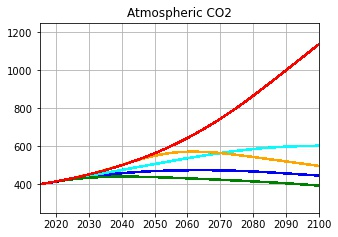

In [18]:
s = 0

fig= plt.subplots(1,1,figsize=(5,3.5))

for scen in scenarios:
    i = mindex[s]

    
    plt.plot(time,magic_co2s[i,:,:].transpose(),color=scen_colors[s])
    plt.title(f"Atmospheric CO2")
    plt.ylabel("")
    plt.grid(True)
    plt.xlim(2015,2100)
    plt.ylim(250,1250)
        # Loop on models
    m = 0
    s+=1

#fig.savefig("/data/artemis/workspace/vbennington/CMIP6_figs/magic7_emulations.eps")
#plt.show()